In [2]:
%matplotlib inline

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sqlalchemy

# Data Acquisition
## Live demos

In [4]:
pd.Series([4,5.5,6], dtype="float32") # init type

0    4.0
1    5.5
2    6.0
dtype: float32

In [5]:
pd.Series([4,5.5,6]).astype(np.float32) # convert type

0    4.0
1    5.5
2    6.0
dtype: float32

In [6]:
pd.Series([4, 5.5, 6]).sum()

15.5

In [8]:
accidents_data = pd.read_csv("data/accidents.csv")

In [12]:
type(accidents_data)

pandas.core.frame.DataFrame

In [9]:
accidents_data

,Miles from Home,% of Accidents
0,less than 1,23
1,1 to 5,29
2,6 to 10,17
3,11 to 15,8
4,16 to 20,6
5,over 20,17


In [10]:
accidents_data.columns

Index(['Miles from Home', '% of Accidents'], dtype='object')

In [11]:
accidents_data["% of Accidents"]

0    23
1    29
2    17
3     8
4     6
5    17
Name: % of Accidents, dtype: int64

In [13]:
type(accidents_data['% of Accidents'])

pandas.core.series.Series

In [15]:
accidents_data.index

RangeIndex(start=0, stop=6, step=1)

Text(0.5, 0, '% of Accidents')

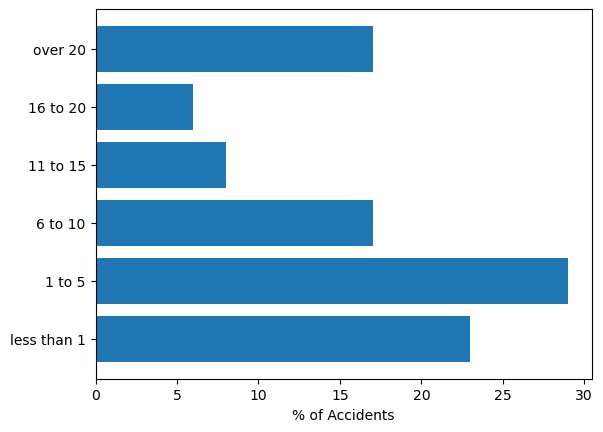

In [20]:
plt.barh(accidents_data['Miles from Home'], accidents_data['% of Accidents'])
plt.xlabel('% of Accidents')

## Auto_mpg

In [22]:
auto_mp_data = pd.read_fwf("data/auto_data/auto-mpg.data", header = None)
auto_mp_data.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']

In [23]:
auto_mp_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,"""ford ranger"""


(array([ 3.,  4.,  6., 39., 17., 22., 16., 36., 21., 19., 14., 28., 16.,
        21., 17., 22., 12., 14., 16., 11., 11., 10.,  6.,  6.,  2.,  3.,
         0.,  3.,  2.,  1.]),
 array([ 9.        , 10.25333333, 11.50666667, 12.76      , 14.01333333,
        15.26666667, 16.52      , 17.77333333, 19.02666667, 20.28      ,
        21.53333333, 22.78666667, 24.04      , 25.29333333, 26.54666667,
        27.8       , 29.05333333, 30.30666667, 31.56      , 32.81333333,
        34.06666667, 35.32      , 36.57333333, 37.82666667, 39.08      ,
        40.33333333, 41.58666667, 42.84      , 44.09333333, 45.34666667,
        46.6       ]),
 <BarContainer object of 30 artists>)

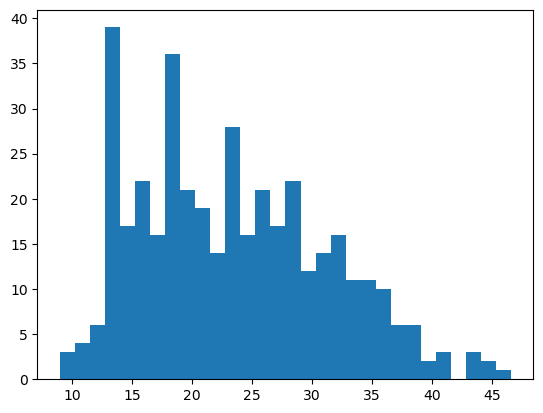

In [25]:
plt.hist(auto_mp_data.mpg, bins=30)

In [26]:
auto_mp_data.shape

(398, 9)

In [27]:
auto_mp_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [28]:
auto_mp_data.horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [34]:
auto_mp_data.horsepower.astype(float)

ValueError: could not convert string to float: '?'

In [38]:
auto_mp_data[auto_mp_data['horsepower']== '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046.0,19.0,71,1,"""ford pinto"""
126,21.0,6,200.0,?,2875.0,17.0,74,1,"""ford maverick"""
330,40.9,4,85.0,?,1835.0,17.3,80,2,"""renault lecar deluxe"""
336,23.6,4,140.0,?,2905.0,14.3,80,1,"""ford mustang cobra"""
354,34.5,4,100.0,?,2320.0,15.8,81,2,"""renault 18i"""
374,23.0,4,151.0,?,3035.0,20.5,82,1,"""amc concord dl"""


In [39]:
auto_mp_data.cylinders.min(), auto_mp_data.cylinders.max()

(3, 8)

In [41]:
auto_mp_data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


## Read from excel

In [44]:
green_trip_data = pd.read_excel('data/green_tripdata_2015-09.xls')

In [45]:
green_trip_data

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,2,2015-09-02 16:51:59,2015-09-02 17:04:00,N,1,-73.829605,40.759716,-73.832214,40.751514,1,...,9.0,1.0,0.5,0.00,0.0,NaN,0.3,10.80,2,1
65531,2,2015-09-02 16:53:51,2015-09-02 17:04:32,N,1,-73.962112,40.805710,-73.984970,40.769550,1,...,10.5,1.0,0.5,2.46,0.0,NaN,0.3,14.76,1,1
65532,2,2015-09-02 16:57:21,2015-09-02 17:05:03,N,1,-73.829941,40.713718,-73.831917,40.702145,1,...,7.0,1.0,0.5,2.20,0.0,NaN,0.3,11.00,1,1
65533,2,2015-09-02 16:51:42,2015-09-02 17:05:28,N,1,-73.860748,40.832661,-73.845169,40.845306,1,...,10.5,1.0,0.5,2.46,0.0,NaN,0.3,14.76,1,1


In [46]:
green_trip_data.describe().T

,count,mean,min,25%,50%,75%,max,std
VendorID,65535.0,1.784497,1.0,2.0,2.0,2.0,2.0,0.411174
lpep_pickup_datetime,65535,2015-09-01 21:41:36.600595200,2015-09-01 00:00:00,2015-09-01 13:17:26,2015-09-01 20:08:37,2015-09-02 08:35:17,2015-09-02 16:59:45,NaN
Lpep_dropoff_datetime,65535,2015-09-01 21:56:13.970427904,2015-09-01 00:00:00,2015-09-01 13:30:47,2015-09-01 20:21:49,2015-09-02 08:51:38.500000,2015-09-03 16:09:19,NaN
RateCodeID,65535.0,1.12491,1.0,1.0,1.0,1.0,99.0,0.781101
Pickup_longitude,65535.0,-73.808157,-75.056404,-73.958015,-73.944176,-73.915222,0.0,3.04051
Pickup_latitude,65535.0,40.685263,0.0,40.70067,40.753559,40.804974,41.032986,1.676843
Dropoff_longitude,65535.0,-73.851127,-75.081306,-73.967205,-73.94474,-73.909496,0.0,2.466746
Dropoff_latitude,65535.0,40.706524,0.0,40.704659,40.754356,40.798569,41.227257,1.360617
Passenger_count,65535.0,1.349432,0.0,1.0,1.0,1.0,9.0,1.023215
Trip_distance,65535.0,2.901488,0.0,1.02,1.88,3.65,62.34,3.026139


In [47]:
green_trip_data.shape

(65535, 21)

In [48]:
green_trip_data.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
Lpep_dropoff_datetime    datetime64[ns]
Store_and_fwd_flag               object
RateCodeID                        int64
Pickup_longitude                float64
Pickup_latitude                 float64
Dropoff_longitude               float64
Dropoff_latitude                float64
Passenger_count                   int64
Trip_distance                   float64
Fare_amount                     float64
Extra                           float64
MTA_tax                         float64
Tip_amount                      float64
Tolls_amount                    float64
Ehail_fee                       float64
improvement_surcharge           float64
Total_amount                    float64
Payment_type                      int64
Trip_type                         int64
dtype: object

In [51]:
gren_trip_data_filtered=green_trip_data[(green_trip_data.Pickup_latitude!=0) & (green_trip_data.Pickup_longitude!=0)]

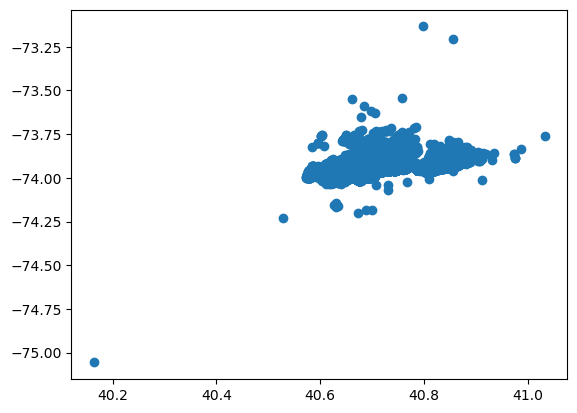

In [52]:
plt.scatter(gren_trip_data_filtered.Pickup_latitude, gren_trip_data_filtered.Pickup_longitude)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1000e+01,
        1.0000e+00, 3.0000e+00, 2.6950e+03, 5.2125e+04, 8.3140e+03,
        1.7320e+03, 4.6000e+02, 1.0100e+02, 4.9000e+01, 1.3000e+01,
        1.3000e+01, 5.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-400. , -382.4, -364.8, -347.2, -329.6, -312. , -294.4, -276.8,
        -259.2, -241.6, -224. , -206.4, -188.8, -171.2, -153.6, -136. ,
        -118.4, -100.8,  -83.2,  -65.6,  -48. ,  -30.4,  -12.8,    4.8,
          22.4,   40. ,   57.6,   75.2,   92.8,  110.4,  128. ,  145.6,
         163.2,  180.8,  198.4

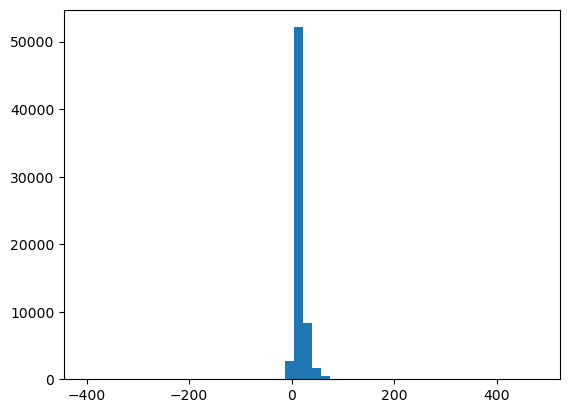

In [53]:
plt.hist(green_trip_data.Total_amount, bins =50)

In [54]:
green_trip_data[green_trip_data.Total_amount < 0]

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
196,2,2015-09-01 00:11:22,2015-09-01 00:20:26,N,1,-73.949593,40.680508,-73.942253,40.700764,1,...,-2.5,-0.5,-0.5,0.0,0.0,NaN,-0.3,-3.8,3,1
437,2,2015-09-01 00:31:49,2015-09-01 00:35:08,N,1,-73.903450,40.745419,-73.914360,40.745659,5,...,-4.5,-0.5,-0.5,0.0,0.0,NaN,-0.3,-5.8,4,1
568,2,2015-09-01 00:43:31,2015-09-01 00:44:41,N,1,-73.844284,40.721066,-73.844727,40.720230,1,...,-3.0,-0.5,-0.5,0.0,0.0,NaN,-0.3,-4.3,3,1
961,2,2015-09-01 00:14:55,2015-09-01 00:15:11,N,2,-73.946716,40.714317,-73.944954,40.714466,2,...,-52.0,0.0,-0.5,0.0,0.0,NaN,-0.3,-52.8,4,1
1297,2,2015-09-01 01:00:16,2015-09-01 01:01:07,N,1,-73.863174,40.835274,-73.868782,40.836048,1,...,-2.5,-0.5,-0.5,0.0,0.0,NaN,-0.3,-3.8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62113,2,2015-09-02 15:12:08,2015-09-02 15:12:12,N,1,-73.824844,40.677002,-73.824837,40.677029,1,...,-2.5,0.0,-0.5,0.0,0.0,NaN,-0.3,-3.3,3,1
62252,2,2015-09-02 15:04:03,2015-09-02 15:04:39,N,1,-73.962517,40.809719,-73.962761,40.809769,1,...,-2.5,0.0,-0.5,0.0,0.0,NaN,-0.3,-3.3,3,1
62432,2,2015-09-02 15:25:44,2015-09-02 15:31:13,N,1,-73.876099,40.876999,-73.875603,40.877567,1,...,-5.0,0.0,-0.5,0.0,0.0,NaN,-0.3,-5.8,3,1
64197,2,2015-09-02 16:03:36,2015-09-02 16:04:12,N,1,-73.899155,40.679638,-73.898666,40.678555,1,...,-2.5,-1.0,-0.5,0.0,0.0,NaN,-0.3,-4.3,4,1


## READ from API

In [57]:
books_data = pd.read_json('https://openlibrary.org/api/books?bibkeys=ISBN:9780345354907,ISBN:0881847690,LCCN:2005041555,ISBN:0060957905&format=json',orient="index")

In [58]:
books_data

,bib_key,info_url,preview,preview_url,thumbnail_url
ISBN:9780345354907,ISBN:9780345354907,https://openlibrary.org/books/OL9831606M/The_C...,restricted,https://archive.org/details/caseofcharlesdex00...,https://covers.openlibrary.org/b/id/207586-S.jpg
ISBN:0881847690,ISBN:0881847690,https://openlibrary.org/books/OL22232644M/Watc...,restricted,https://archive.org/details/watchersoutoftim00...,https://covers.openlibrary.org/b/id/9871313-S.jpg
LCCN:2005041555,LCCN:2005041555,https://openlibrary.org/books/OL3421202M/At_th...,restricted,https://archive.org/details/atmountainsofmad00...,https://covers.openlibrary.org/b/id/8259841-S.jpg
ISBN:0060957905,ISBN:0060957905,https://openlibrary.org/books/OL6784868M/Tales...,noview,https://openlibrary.org/books/OL6784868M/Tales...,https://covers.openlibrary.org/b/id/676505-S.jpg


## Reading data from SQL

In [59]:
# conda install SQLAlchemy

1. sqlalchemy.create_engine("mssql+pyodbc://YORDAN\\SQLEXPRESS01/AdventureWorks2022?driver=SQL+Server&integerated+security=true")
2. engine.connect()
3. pandas.read_sql('Request", engine) # pandas.read_sql('Select * from Person', engine)